<a href="https://colab.research.google.com/github/bhushan0512/online-fraud-detection/blob/main/online_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import warnings, copy
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from tabulate import tabulate
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
init_notebook_mode(connected=True)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#Load the Dataset

In [ ]:
onlinefraud = pd.read_csv("./onlinefraud.csv")
print(onlinefraud.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


#Analysing Dataset

In [ ]:
onlinefraud.describe().round(3)
onlinefraud.info()
onlinefraud.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260509 entries, 0 to 260508
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260509 non-null  int64  
 1   type            260509 non-null  object 
 2   amount          260509 non-null  float64
 3   nameOrig        260509 non-null  object 
 4   oldbalanceOrg   260509 non-null  float64
 5   newbalanceOrig  260509 non-null  float64
 6   nameDest        260508 non-null  object 
 7   oldbalanceDest  260508 non-null  float64
 8   newbalanceDest  260508 non-null  float64
 9   isFraud         260508 non-null  float64
 10  isFlaggedFraud  260508 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.9+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
fraud_min_max = [
    ['amount', onlinefraud.amount.min(), onlinefraud.amount.max()],
    ['oldbalanceOrg', onlinefraud.oldbalanceOrg.min(), onlinefraud.oldbalanceOrg.max()],
    ['newbalanceOrig', onlinefraud.newbalanceOrig.min(), onlinefraud.newbalanceOrig.max()],
    ['oldbalanceDest', onlinefraud.oldbalanceDest.min(), onlinefraud.oldbalanceDest.max()],
    ['isFraud', onlinefraud.isFraud.min(), onlinefraud.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='orgtbl',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----+----------------+-------------+-------------|
|  0 | amount         |         0.3 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 3.89394e+07 |
|  2 | newbalanceOrig |           0 | 3.89462e+07 |
|  3 | oldbalanceDest |           0 | 4.13384e+07 |
|  4 | isFraud        |           0 |           1 |


In [ ]:
# Downcast numerical columns with smaller dtype

df = onlinefraud
for col in onlinefraud.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')# Downcast numerical columns with smaller dtype

df = onlinefraud
for col in onlinefraud.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [ ]:
# Check duplicate values
df.duplicated().sum()

0

#Exploratory Dataset

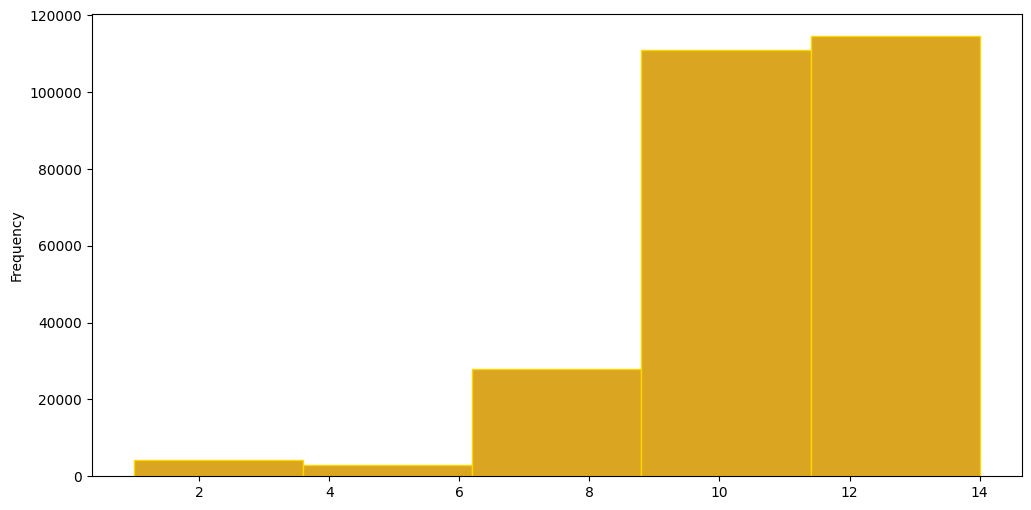

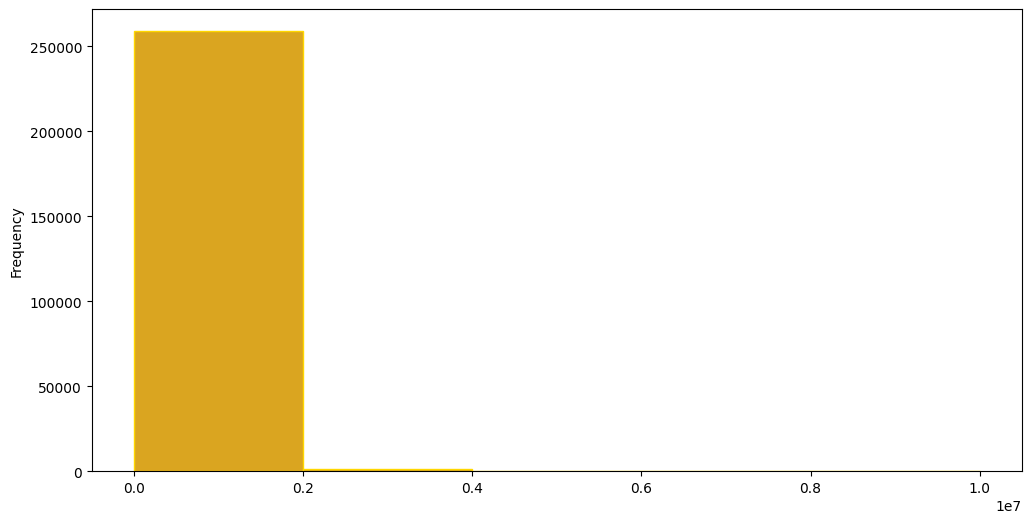

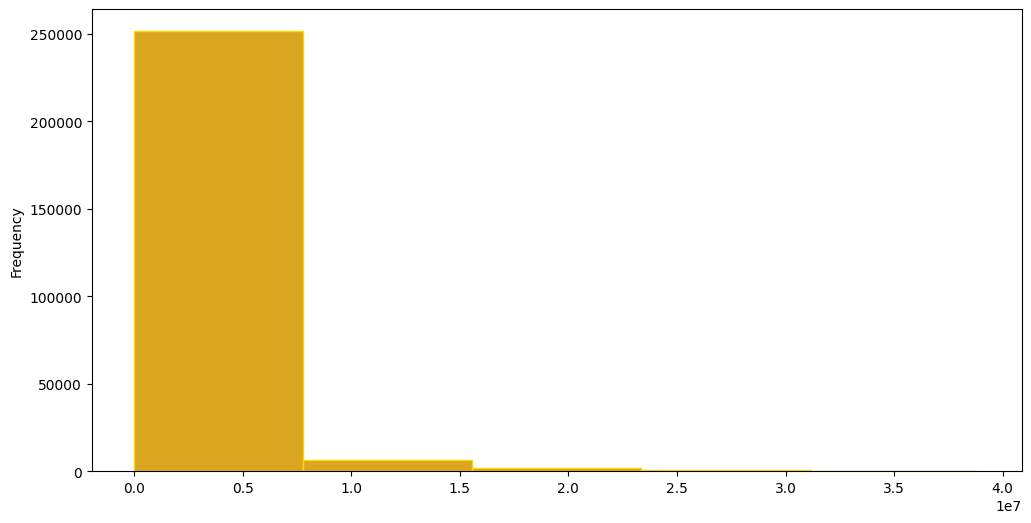

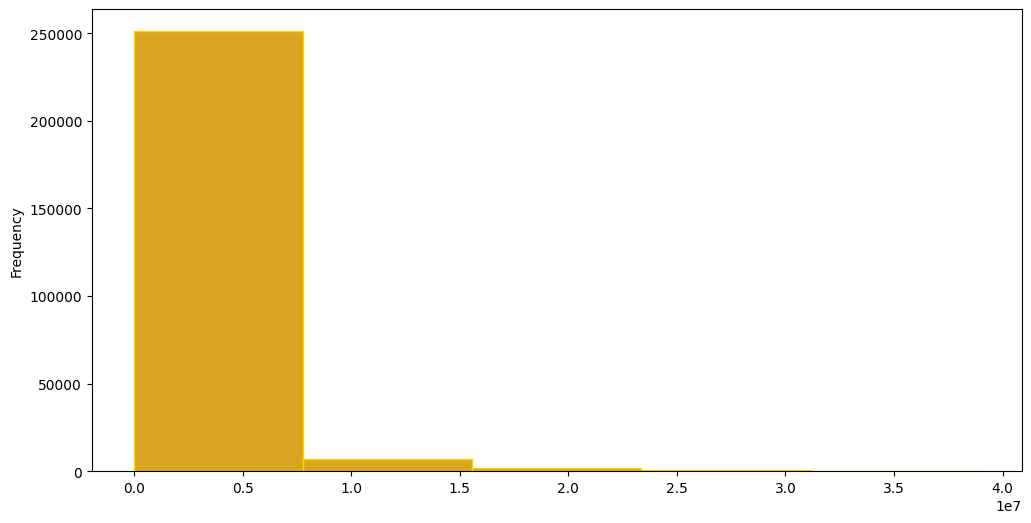

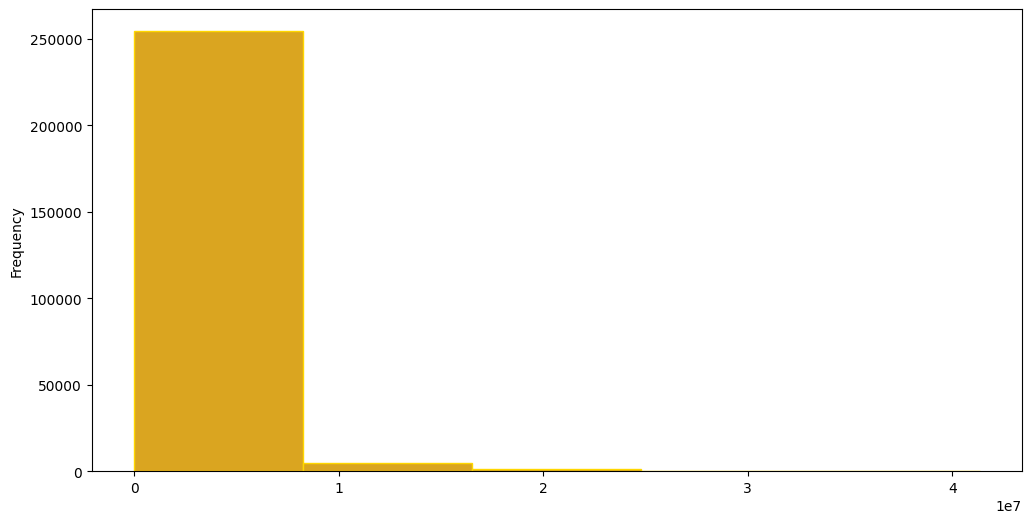

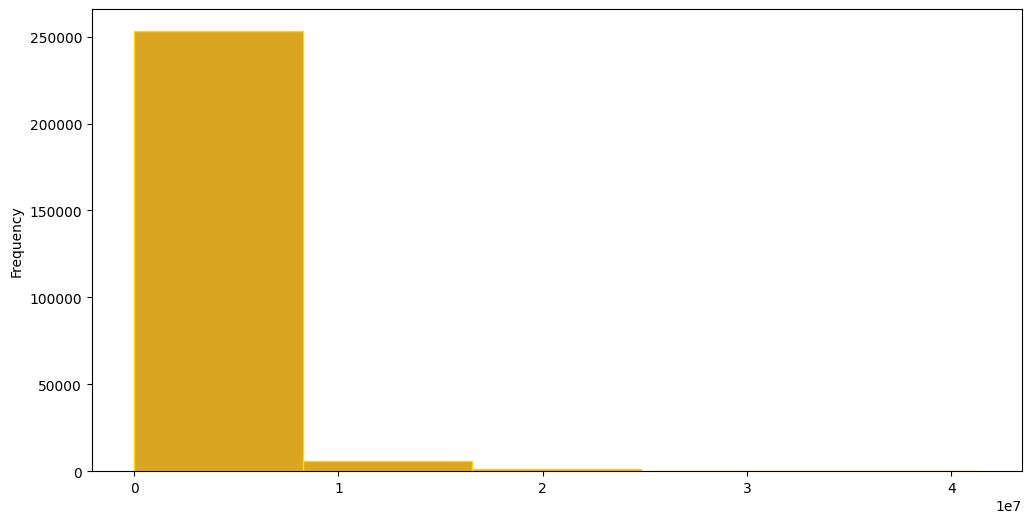

In [ ]:
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='goldenrod',edgecolor='gold')
    plt.show()

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')

amount
4316.14
416325.95400000014


oldbalanceOrg
0.0
2280733.2480000006


newbalanceOrig
0.0
2396315.402000003


oldbalanceDest
0.0
2624012.877000002


newbalanceDest
0.0
3364953.91




In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8513823692610837


Feature:  oldbalanceOrg
Skewness value:  2.0858119646400044


Feature:  newbalanceOrig
Skewness value:  2.0818930629717314


Feature:  oldbalanceDest
Skewness value:  1.4376778213881016


Feature:  newbalanceDest
Skewness value:  1.3257909079712227




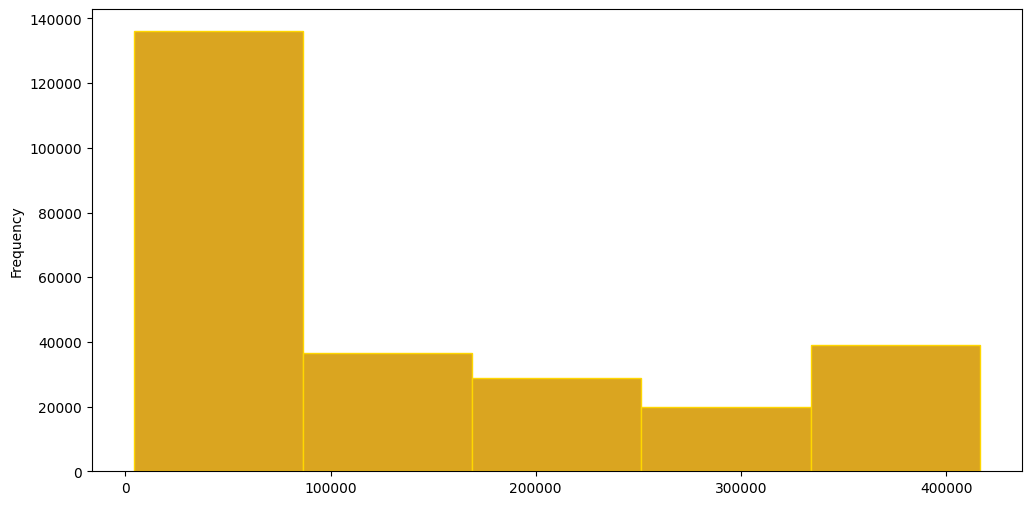

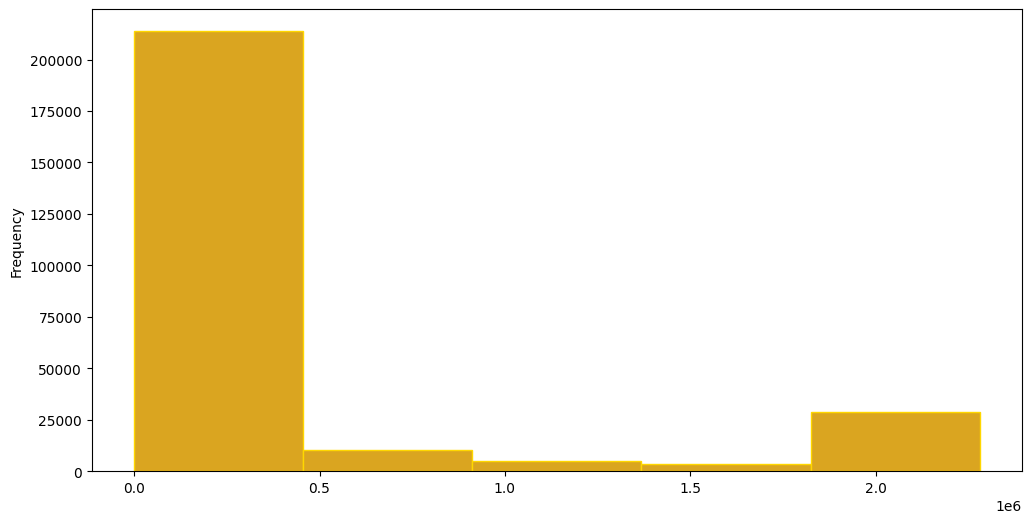

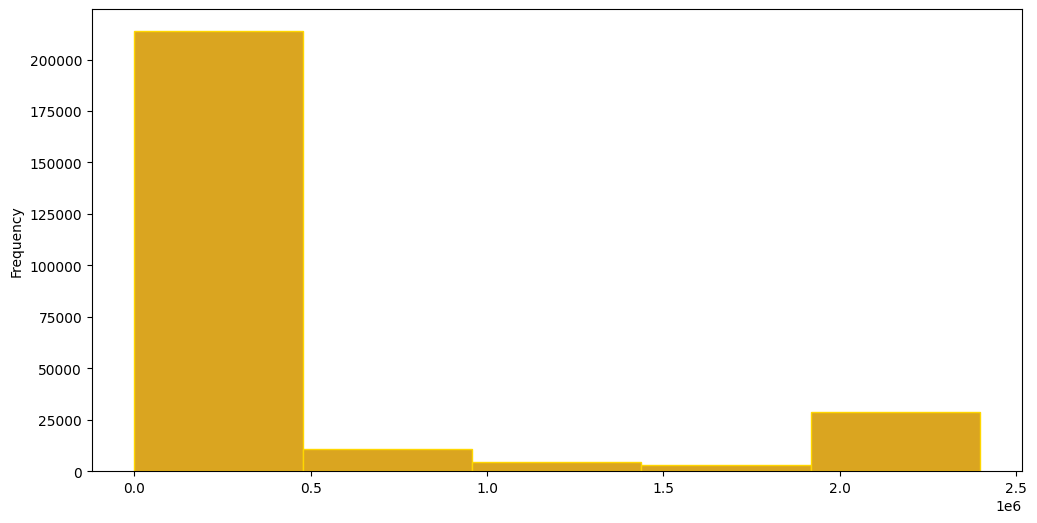

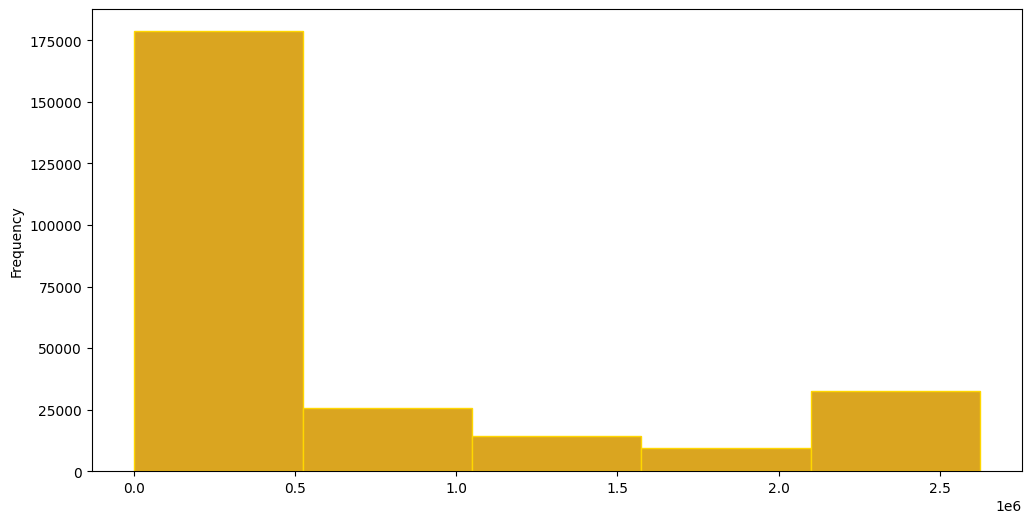

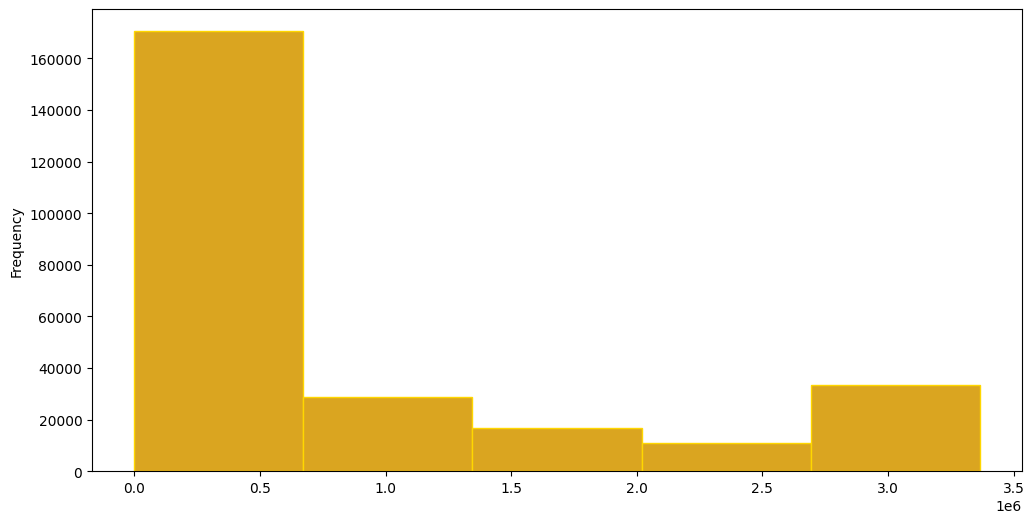

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='goldenrod',edgecolor='gold')
    plt.show()

#Type

In [ ]:
df.type

0          PAYMENT
1          PAYMENT
2         TRANSFER
3         CASH_OUT
4          PAYMENT
            ...   
260504    CASH_OUT
260505    CASH_OUT
260506    CASH_OUT
260507    CASH_OUT
260508    CASH_OUT
Name: type, Length: 260509, dtype: category
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [ ]:
df.type.unique()

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [ ]:
payment = df.type.value_counts()
payment

type
PAYMENT     92331
CASH_OUT    89666
CASH_IN     54729
TRANSFER    21782
DEBIT        2001
Name: count, dtype: int64

<Axes: ylabel='type'>

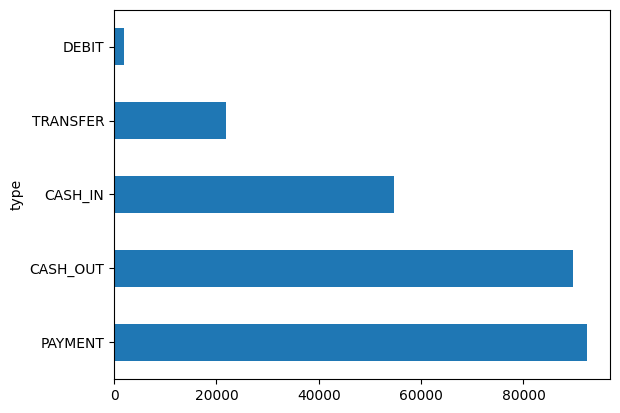

In [ ]:
payment.plot(kind='barh')

<Axes: xlabel='type', ylabel='count'>

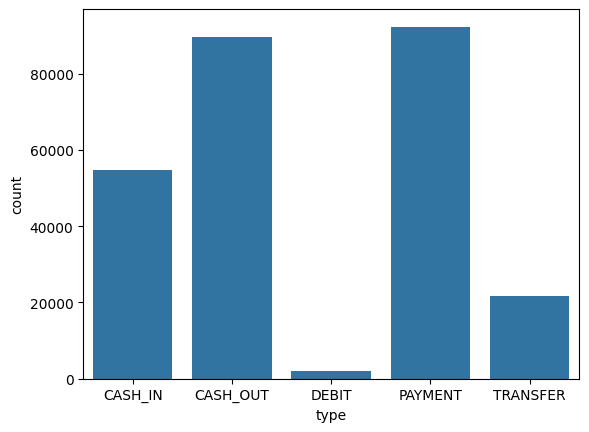

In [ ]:
sns.countplot(x='type', data=df)

In [ ]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0.0,1.0
type,,
CASH_IN,54729,0
CASH_OUT,89580,85
DEBIT,2001,0
PAYMENT,92331,0
TRANSFER,21700,82


In [ ]:
#with fraud happened type
CrosstabResult[1]

type
CASH_IN      0
CASH_OUT    85
DEBIT        0
PAYMENT      0
TRANSFER    82
Name: 1.0, dtype: int64

<Axes: xlabel='type'>

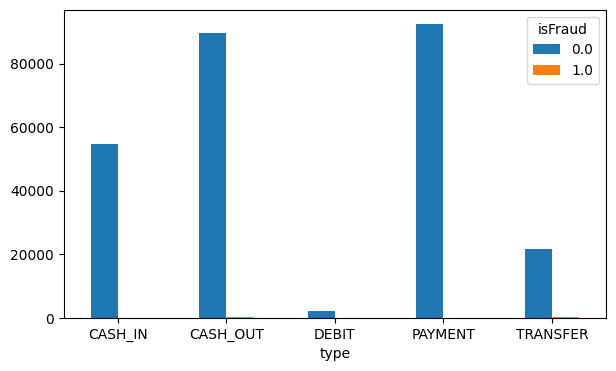

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<Axes: xlabel='type'>

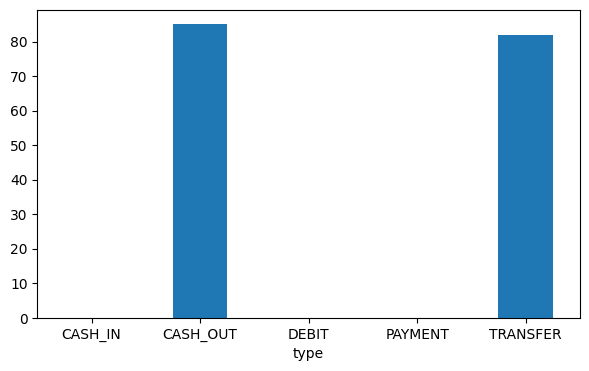

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD with maximizing
CrosstabResult[1].plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

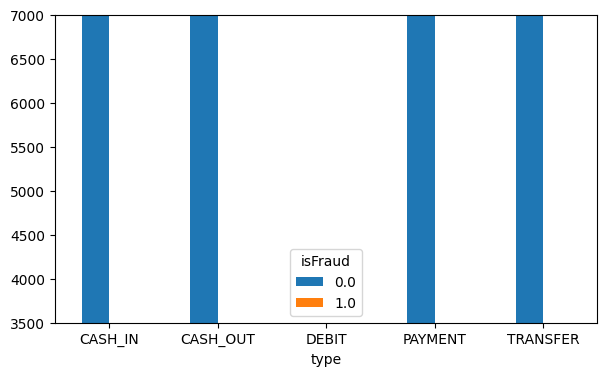

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

In [ ]:
CrosstabResult

isFraud,0.0,1.0
type,,
CASH_IN,54729,0
CASH_OUT,89580,85
DEBIT,2001,0
PAYMENT,92331,0
TRANSFER,21700,82


In [ ]:
cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

In [ ]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

#Amount

In [ ]:
df.amount

0           9839.64
1           4316.14
2           4316.14
3           4316.14
4          11668.14
            ...    
260504    178684.97
260505    118586.47
260506    308503.35
260507    310920.52
260508     56206.95
Name: amount, Length: 260509, dtype: float64

<Axes: ylabel='amount'>

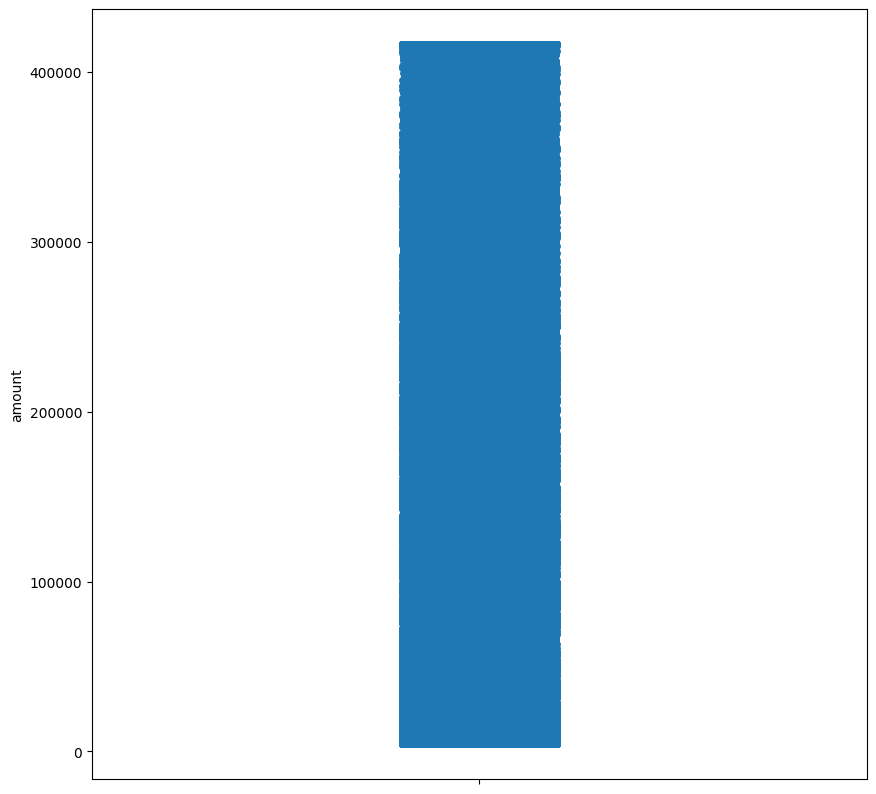

In [ ]:
plt.figure(figsize=(10,10))
sns.stripplot(y=df.amount)

In [ ]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  4316.14
Maximum:  416325.95400000014


<Axes: title={'center': 'amount'}, xlabel='isFraud'>

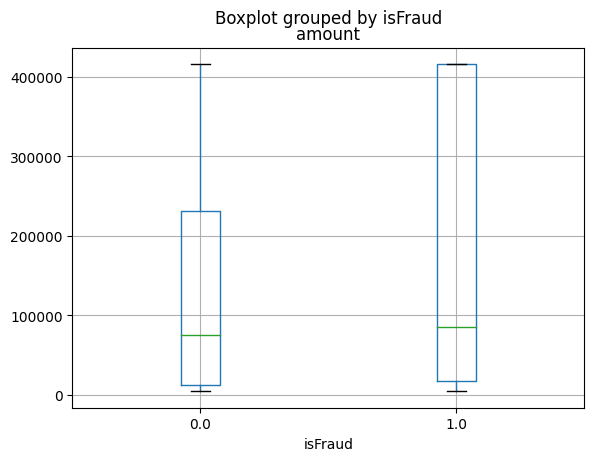

In [ ]:
df.boxplot(column='amount', by='isFraud')

#Is Flagged Fraud

In [ ]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0.0    260508
Name: count, dtype: int64

In [ ]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
flagged_fraud_records.shape

(0, 11)

In [ ]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

167

In [ ]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

0

In [ ]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.0
Percentage of incorrectly flagged fraud:  100.0


#Is Fraud

In [ ]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.06410527083517269

In [ ]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  260509
Total fraud transactions happened:  167
Total fraud transaction percent:  0.06


In [ ]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
25875,8,TRANSFER,416325.954,C1026280121,0.000,0.000,C277510102,0.000,970749.68,1.0,0.0
4440,4,TRANSFER,416325.954,C7162498,2280733.248,2396315.402,C945327594,0.000,0.00,1.0,0.0
4442,4,TRANSFER,416325.954,C2047521920,2280733.248,0.000,C449261773,0.000,0.00,1.0,0.0
4443,4,CASH_OUT,416325.954,C2044690596,2280733.248,0.000,C932583850,2624012.877,3364953.91,1.0,0.0
12467,7,TRANSFER,416325.954,C1023505879,441445.580,0.000,C847761155,0.000,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
182861,13,TRANSFER,4316.140,C2021466585,408.000,0.000,C1864486913,0.000,226013.18,1.0,0.0
174585,12,CASH_OUT,4316.140,C1331829443,2007.000,0.000,C127509847,129917.800,250910.76,1.0,0.0
174584,12,TRANSFER,4316.140,C439464764,2007.000,0.000,C562360384,0.000,0.00,1.0,0.0
136419,11,TRANSFER,4316.140,C785601242,2100.000,0.000,C1576053316,0.000,0.00,1.0,0.0


<Axes: ylabel='Frequency'>

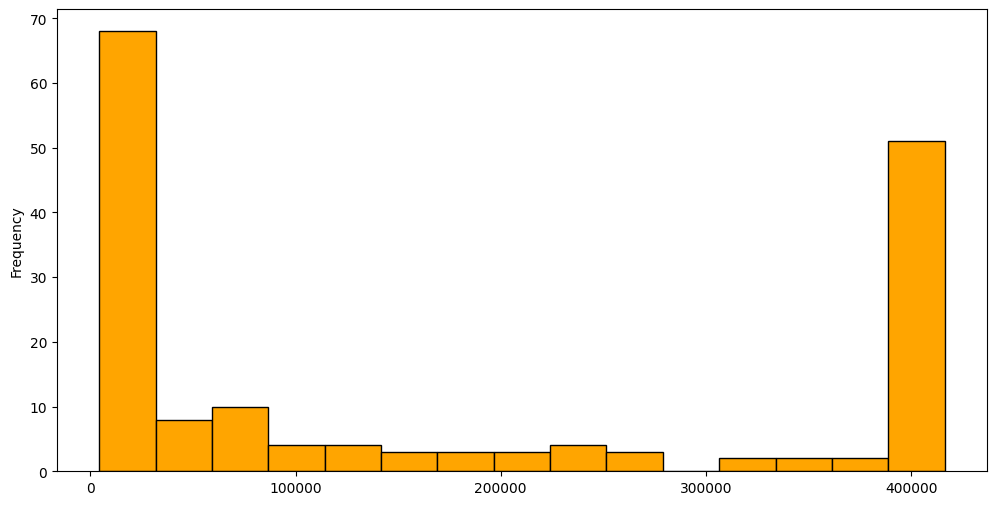

In [ ]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

#Name dest

In [ ]:
fraudster= df.nameDest.value_counts()
fraudster

nameDest
C985934102     85
C1286084959    84
C2083562754    79
C248609774     79
C1590550415    76
               ..
M1140399304     1
M1066707487     1
M1093301408     1
M1122817206     1
C726864847      1
Name: count, Length: 119861, dtype: int64

In [ ]:
fraudster[:10]

nameDest
C985934102     85
C1286084959    84
C2083562754    79
C248609774     79
C1590550415    76
C665576141     76
C977993101     73
C1360767589    72
C451111351     70
C97730845      66
Name: count, dtype: int64

<Axes: ylabel='nameDest'>

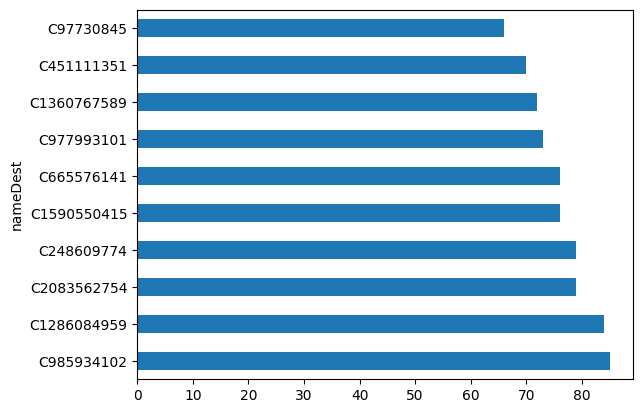

In [ ]:
fraudster[:10].plot(kind='barh')

#Step

<Axes: xlabel='step', ylabel='Density'>

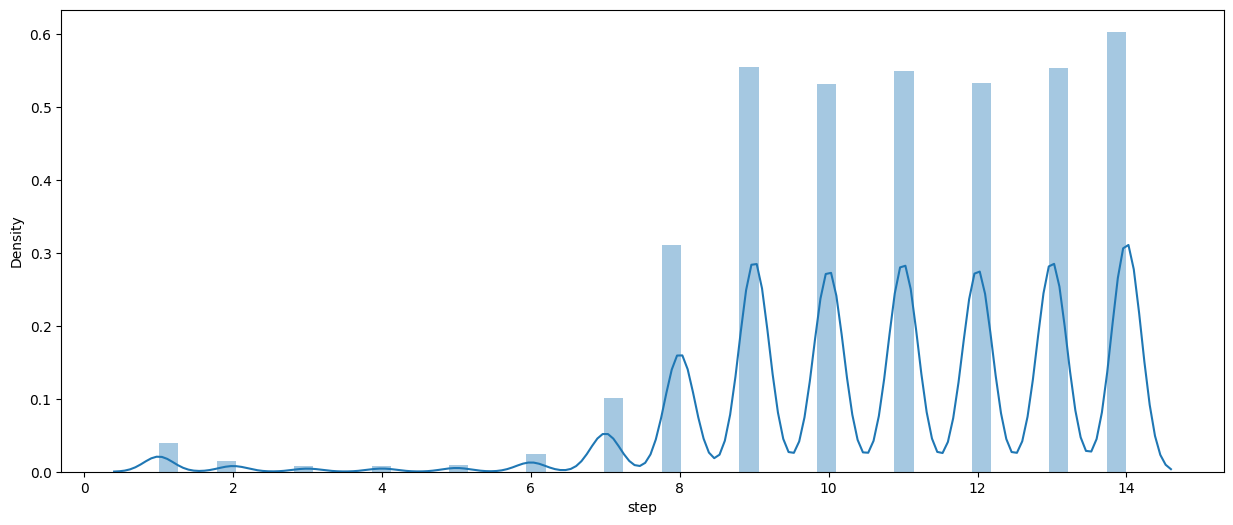

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

#Correlation Between Features

<Axes: >

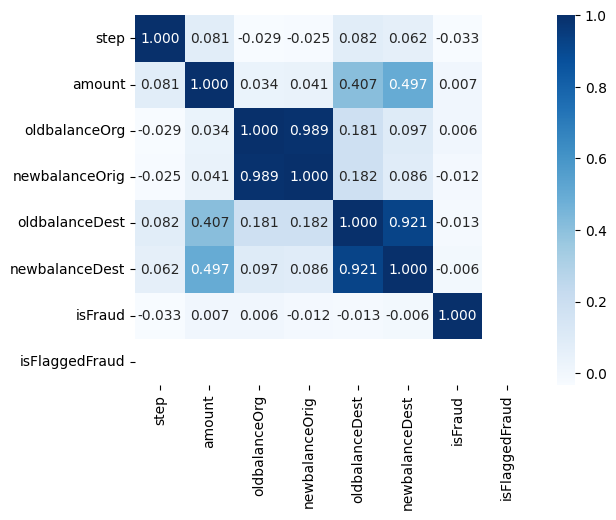

In [ ]:
# calculate correlation matrix
corr = df.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

#balancing the data

In [ ]:
onlinefraud['isFraud'].value_counts()

isFraud
0.0    260341
1.0       167
Name: count, dtype: int64

#Separating the data for analysis

In [ ]:
legit_txns = onlinefraud[onlinefraud.isFraud == 0]
fraud_txns = onlinefraud[onlinefraud.isFraud == 1]

In [ ]:
print(legit_txns.shape)
print(fraud_txns.shape)

(260341, 11)
(167, 11)


#Checking the statistical measures of the data for comaprison after undersampling

In [ ]:
legit_txns.amount.describe()

count    260341.000000
mean     134718.162301
std      142356.516708
min        4316.140000
25%       12460.990000
50%       74832.920000
75%      231543.910000
max      416325.954000
Name: amount, dtype: float64

In [ ]:
fraud_txns.amount.describe()

count       167.000000
mean     176776.128503
std      177765.731192
min        4316.140000
25%       17283.455000
50%       85354.690000
75%      416325.954000
max      416325.954000
Name: amount, dtype: float64

In [ ]:
legit_sample = legit_txns.sample(n=8213) # Samples 8213 transactions out of the legit transactions

undersampled_dataset = pd.concat([legit_sample, fraud_txns], axis=0) # Concatenates all the 8213 the fraud_txns and the 8213 samples of the legit txns

In [ ]:
undersampled_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
118404,11,CASH_OUT,247344.24,C306871480,0.00,0.00,C92822703,841061.54,1088405.78,0.0,0.0
181942,12,CASH_OUT,175046.79,C1759246762,16520.00,0.00,C170133906,206304.43,18164.48,0.0,0.0
670,1,DEBIT,4316.14,C548795052,64665.82,61553.96,C240650537,10070.22,0.00,0.0,0.0
15771,8,CASH_OUT,209434.06,C1751089113,1.00,0.00,C599265282,10685.00,840007.73,0.0,0.0
84892,10,CASH_IN,71159.90,C1421370559,166898.00,238057.90,C1000910565,337914.91,3001.17,0.0,0.0


In [ ]:
undersampled_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
248772,14,CASH_OUT,416325.954,C803703656,1832319.42,0.0,C858007309,43962.420,2440139.69,1.0,0.0
255701,14,TRANSFER,416325.954,C736093511,1561891.66,0.0,C1224081716,0.000,0.00,1.0,0.0
255702,14,CASH_OUT,416325.954,C15204463,1561891.66,0.0,C1255502452,2624012.877,3364953.91,1.0,0.0
259844,14,TRANSFER,65488.050,C236875489,65488.05,0.0,C528705657,0.000,0.00,1.0,0.0
259845,14,CASH_OUT,65488.050,C1137669976,65488.05,0.0,C1526507740,0.000,65488.05,1.0,0.0


#!!!Not yet completed!!!

fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')